<a href="https://colab.research.google.com/github/TiagoSpiandorello/Analise_de_portfolio_de_acoes/blob/main/analise_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação das bibliotecas necessárias para o projeto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

# 1- Extração dos dados de um portfólio de ações do site Yahoo Finance

In [2]:
# PETR4 = Petrobras
# BBDC4 = Bradesco
# ABEV3 = AMBEV
# WEGE3 = Weg
# VALE3 - Vale

tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA']
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

bolsas.tail(10)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2021-06-09,28.660000,28.100000,19.309999,34.250000,112.199997
2021-06-10,28.680000,28.150000,19.320000,33.930000,111.830002
2021-06-11,28.570000,28.040001,18.940001,34.209999,114.339996
2021-06-14,28.750000,27.920000,19.480000,34.880001,113.720001
2021-06-15,29.030001,27.940001,19.129999,35.459999,111.500000
2021-06-16,29.139999,28.080000,19.090000,34.830002,108.150002
2021-06-17,28.129999,27.959999,19.010000,34.419998,105.900002
2021-06-18,28.320000,27.600000,18.760000,35.189999,109.089996
2021-06-21,28.950001,27.670000,18.730000,35.250000,110.110001


# 2- Cálculo da taxa de retorno histórica do portfólio.

## Normalização dos dados para base 100

### (P1 / P0) * 100

#### Essa manipulação permite comparar o comportamento das ações em uma situação hipotética em que todas iniciam com valor 100. 

In [3]:
bolsas.iloc[0]

PETR4.SA    28.142263
BBDC4.SA    10.765183
ABEV3.SA     4.187932
WEGE3.SA     2.144630
VALE3.SA    32.089706
Name: 2010-01-04 00:00:00, dtype: float64

<function matplotlib.pyplot.show>

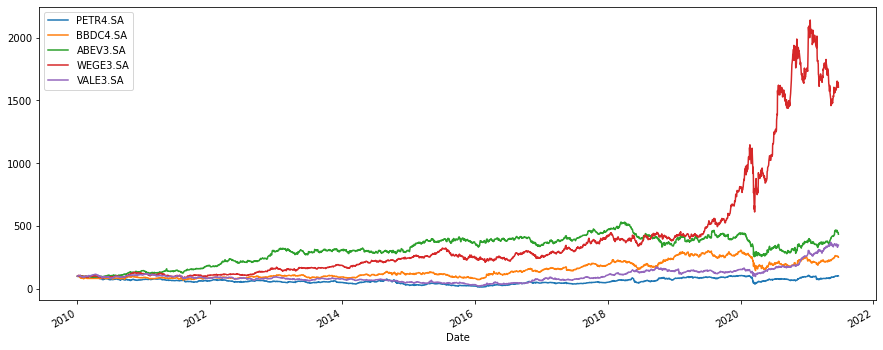

In [4]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize= (15,6));
plt.show

## Taxa de retorno simples = (preço final - preço inicial) / preço inicial


In [5]:
retorno_simples = (bolsas / bolsas.shift(1)) - 1
retorno_simples.head()

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008574,-0.004956,0.005882,-0.002182,0.009322
2010-01-06,0.013513,-0.008000,0.010202,0.005468,0.021166
2010-01-07,-0.009333,-0.002688,0.004695,0.016857,0.004145
2010-01-08,-0.005384,-0.001079,-0.001921,0.036363,0.009758


In [6]:
# Peso é o percentual que cada ação representa no portfólio. 

# No primeiro cenário, as ações estão distribuídas igualmente, cada uma representando 20% do total de ações.

pesos = np.array([0.2,0.2,0.2,0.2,0.2])
np.dot(retorno_simples, pesos)

array([        nan, -0.0001016 ,  0.00846972, ...,  0.00664427,
        0.0068476 , -0.01292218])

In [7]:
# Retorno anual médio

retorno_anual = retorno_simples.mean() * 250
retorno_anual

PETR4.SA    0.113507
BBDC4.SA    0.140304
ABEV3.SA    0.164221
WEGE3.SA    0.294446
VALE3.SA    0.197952
dtype: float64

In [8]:
np.dot(retorno_anual, pesos)

0.18208616155271604

In [9]:
pfolio1 = str(round(np.dot(retorno_anual, pesos), 5) * 100) + ' %'
print('Esta carteira de ações possui um retorno de ' + pfolio1)

Esta carteira de ações possui um retorno de 18.209 %


In [10]:
# No segundo cenário, as ações não estão distribuídas igualmente, de forma que a WEGE3 representa 40%, a PETR4 10% e as restantes 20% cada do total de ações.
 
pesos2 = np.array([0.1,0.2,0.2,0.4,0.2])
pfolio2 = str(round(np.dot(retorno_anual, pesos2), 5) * 100) + ' %'
print('Esta carteira de ações possui um retorno de ' + pfolio2)

Esta carteira de ações possui um retorno de 22.962 %


In [11]:
if (pfolio1 > pfolio2):
  print('O primeiro portfólio possui rendimento superior ao segundo.')
elif (pfolio1 < pfolio2):
  print('O segundo portfólio possui rendimento superior ao primeiro.')
else:
  print('Ambos portfólios possuem o mesmo rendimento.')

O segundo portfólio possui rendimento superior ao primeiro.


In [12]:
# Cálculo da taxa de retorno logarítmica das ações

retorno = np.log(bolsas / bolsas.shift(1))
retorno

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008611,-0.004968,0.005865,-0.002185,0.009279
2010-01-06,0.013423,-0.008032,0.010150,0.005453,0.020945
2010-01-07,-0.009377,-0.002691,0.004684,0.016717,0.004137
2010-01-08,-0.005398,-0.001079,-0.001923,0.035718,0.009711
...,...,...,...,...,...
2021-06-16,0.003782,0.004998,-0.002093,-0.017926,-0.030505
2021-06-17,-0.035275,-0.004283,-0.004199,-0.011841,-0.021024
2021-06-18,0.006732,-0.012959,-0.013238,0.022124,0.029678


## Taxa de retorno logarítmica = log preço final / log preço inicial


In [13]:
acao1 = retorno.columns[0]
acao2 = retorno.columns[1]
acao3 = retorno.columns[2]
acao4 = retorno.columns[3]
acao5 = retorno.columns[4]

In [14]:
media1 = retorno[acao1].mean()
media2 = retorno[acao2].mean()
media3 = retorno[acao3].mean()
media4 = retorno[acao4].mean()
media5 = retorno[acao5].mean()

std1 = retorno[acao1].std()
std2 = retorno[acao1].std()
std3 = retorno[acao1].std()
std4 = retorno[acao1].std()
std5 = retorno[acao1].std()

LOGN_var1 = retorno[acao1].var()
LOGN_var2 = retorno[acao2].var()
LOGN_var3 = retorno[acao2].var()
LOGN_var4 = retorno[acao4].var()
LOGN_var5 = retorno[acao5].var()

print(str(acao1) + "= Retorno Médio: " + str(media1) + " - Desvio Padrão: " + str(std1) + " - Variância: " + str(LOGN_var1))
print(str(acao2) + "= Retorno Médio: " + str(media2) + " - Desvio Padrão: " + str(std2) + " - Variância: " + str(LOGN_var2))
print(str(acao3) + "= Retorno Médio: " + str(media3) + " - Desvio Padrão: " + str(std3) + " - Variância: " + str(LOGN_var3))
print(str(acao4) + "= Retorno Médio: " + str(media4) + " - Desvio Padrão: " + str(std4) + " - Variância: " + str(LOGN_var4))
print(str(acao5) + "= Retorno Médio: " + str(media5) + " - Desvio Padrão: " + str(std5) + " - Variância: " + str(LOGN_var5))

PETR4.SA= Retorno Médio: 8.87076155439423e-06 - Desvio Padrão: 0.0299686701054461 - Variância: 0.0008981211878890587
BBDC4.SA= Retorno Médio: 0.00032454026248368345 - Desvio Padrão: 0.0299686701054461 - Variância: 0.00047374386570777586
ABEV3.SA= Retorno Médio: 0.0005171240436534779 - Desvio Padrão: 0.0299686701054461 - Variância: 0.00047374386570777586
WEGE3.SA= Retorno Médio: 0.0009777954433716255 - Desvio Padrão: 0.0299686701054461 - Variância: 0.00040019081613480896
VALE3.SA= Retorno Médio: 0.0004390228002152139 - Desvio Padrão: 0.0299686701054461 - Variância: 0.0007066702030997569


## Índices de ações

### São uma excelente base comparativa para entender como suas ações estão performando.

### Indicam o que esperar se você investir em um portfólio diversificado

In [15]:
# ^BVSP = IBOVESPA - Brasil
# ^GSPC = S&P500 - EUA
# ^IXIC = NASDAQ - EUA
# ^GDAXI = DAX - Alemanha

tickers = ['^GSPC','^IXIC','^GDAXI','^BVSP']
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo',start='2015-1-1')['Adj Close']

In [16]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2015-01-02,2058.199951,4726.810059,9764.730469,48512.0
2015-01-05,2020.579956,4652.569824,9473.160156,47517.0
2015-01-06,2002.609985,4592.740234,9469.660156,48001.0
2015-01-07,2025.900024,4650.470215,9518.179688,49463.0
2015-01-08,2062.139893,4736.189941,9837.610352,49943.0


<function matplotlib.pyplot.show>

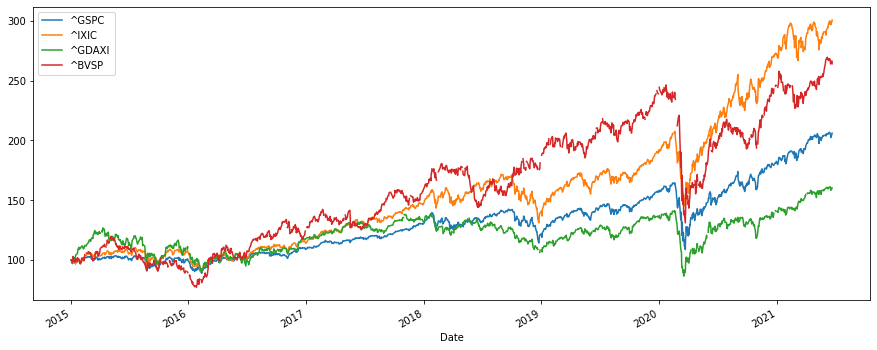

In [17]:
# Normalização dos índices para base 100

(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show

In [18]:
# Retorno simples dos índices

retorno_indices = (ind_data / ind_data.shift(1)) - 1
retorno_indices.tail()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2021-06-16,-0.005390,-0.002358,-0.001205,-0.006396
2021-06-17,-0.000436,0.008666,0.001088,-0.009299
2021-06-18,-0.013124,-0.009248,-0.017779,0.002718
2021-06-21,0.014002,0.007919,0.010047,0.006698
2021-06-22,0.003778,0.005026,0.002121,-0.008975


In [19]:
# Retorno anual dos índices

retorno_anual_ind = retorno_indices.mean() * 250
retorno_anual_ind

^GSPC     0.127852
^IXIC     0.190477
^GDAXI    0.088915
^BVSP     0.179644
dtype: float64

## Compara retorno das ações com índices

In [20]:
tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA','^BVSP']
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

<function matplotlib.pyplot.show>

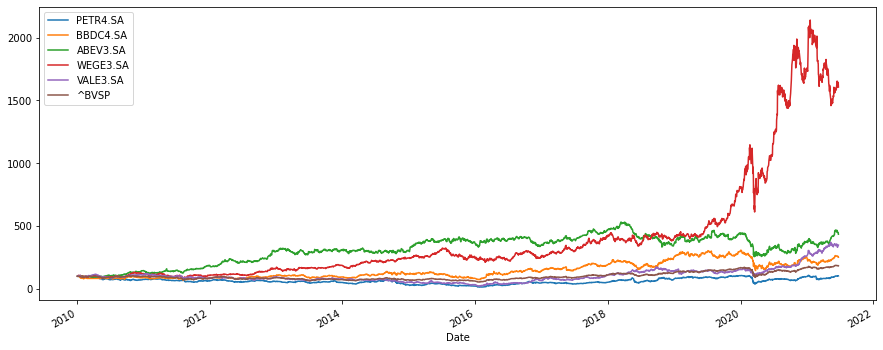

In [21]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize=(15,6));
plt.show

# 3- Medição do risco

### A volatilidade identifica a variabilidade dos rendimentos. Quanto menor a varição, mais estável e menos risco de perdas.

In [22]:
retorno_risco = np.log(bolsas / bolsas.shift(1))
retorno_risco

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008611,-0.004968,0.005865,-0.002185,0.009279,0.002780
2010-01-06,0.013423,-0.008032,0.010150,0.005453,0.020945,0.006938
2010-01-07,-0.009377,-0.002691,0.004684,0.016717,0.004137,-0.003938
2010-01-08,-0.005398,-0.001079,-0.001923,0.035718,0.009711,-0.002672
...,...,...,...,...,...,...
2021-06-16,0.003782,0.004998,-0.002093,-0.017926,-0.030505,-0.006416
2021-06-17,-0.035275,-0.004283,-0.004199,-0.011841,-0.021024,-0.009343
2021-06-18,0.006732,-0.012959,-0.013238,0.022124,0.029678,0.002714


In [23]:
acao1 = retorno_risco.columns[0]
acao2 = retorno_risco.columns[1]
acao3 = retorno_risco.columns[2]
acao4 = retorno_risco.columns[3]
acao5 = retorno_risco.columns[4]

In [24]:
media = retorno_risco[[acao1,acao2,acao3,acao4,acao5]].mean() * 250
print('Quanto maior a média de retorno anual, maior a lucratividade que a ação rendeu.')
print('Média de retorno anual das ações:')
media

Quanto maior a média de retorno anual, maior a lucratividade que a ação rendeu.
Média de retorno anual das ações:


PETR4.SA    0.002218
BBDC4.SA    0.081135
ABEV3.SA    0.129281
WEGE3.SA    0.244500
VALE3.SA    0.109756
dtype: float64

In [25]:
desvio_padrao = retorno_risco[[acao1,acao2,acao3,acao4,acao5]].std() * 250 ** 0.5
print('Quanto maior a volatilidade, maior a chance de ganhos e de perdas bruscas.')
print('Média anual do desvio padrão (volatilidade) das ações:')
desvio_padrao

Quanto maior a volatilidade, maior a chance de ganhos e de perdas bruscas.
Média anual do desvio padrão (volatilidade) das ações:


PETR4.SA    0.473846
BBDC4.SA    0.344145
ABEV3.SA    0.264479
WEGE3.SA    0.316299
VALE3.SA    0.420318
dtype: float64

## Diversificação - Relação entre o preço das ações de diversas empresas

## Covariância

cov > 0 => variáveis se movem na mesma direção

cov < 0 => variáveis se movem em direções opostas

cov = 0 => variáveis são independentes

In [26]:
cov_matrix = retorno_risco.cov()
cov_matrix.round(6)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,0.000898,0.000380,0.000170,0.000181,0.000378,0.000360
BBDC4.SA,0.000380,0.000474,0.000159,0.000150,0.000226,0.000273
ABEV3.SA,0.000170,0.000159,0.000280,0.000112,0.000121,0.000143
WEGE3.SA,0.000181,0.000150,0.000112,0.000400,0.000128,0.000151
VALE3.SA,0.000378,0.000226,0.000121,0.000128,0.000707,0.000263
^BVSP,0.000360,0.000273,0.000143,0.000151,0.000263,0.000252


In [27]:
cov_matrix_anual = retorno_risco.cov() * 250
cov_matrix_anual.round(3)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,0.225,0.095,0.043,0.045,0.095,0.090
BBDC4.SA,0.095,0.118,0.040,0.037,0.057,0.068
ABEV3.SA,0.043,0.040,0.070,0.028,0.030,0.036
WEGE3.SA,0.045,0.037,0.028,0.100,0.032,0.038
VALE3.SA,0.095,0.057,0.030,0.032,0.177,0.066
^BVSP,0.090,0.068,0.036,0.038,0.066,0.063


## Correlação

corr = 1 => correlação perfeita

corr > 0 => variáveis se movem na mesma direção

corr = -1 => correlação perfeitamente negativa

corr < 0 => variáveis se movem em direções opostas

corr = 0 => variáveis absolutamente independentes

In [28]:
# Correlação entre o retorno das ações

corr_matrix = retorno_risco.corr()
corr_matrix.round(2)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,1.00,0.58,0.34,0.30,0.47,0.75
BBDC4.SA,0.58,1.00,0.44,0.34,0.39,0.79
ABEV3.SA,0.34,0.44,1.00,0.34,0.27,0.54
WEGE3.SA,0.30,0.34,0.34,1.00,0.24,0.48
VALE3.SA,0.47,0.39,0.27,0.24,1.00,0.62
^BVSP,0.75,0.79,0.54,0.48,0.62,1.00


<function matplotlib.pyplot.show>

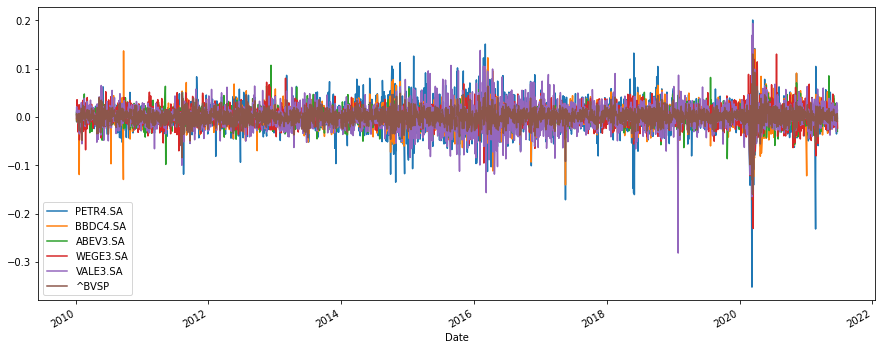

In [29]:
retorno_risco.plot(figsize = (15, 6));
plt.show

In [30]:
# Correlação entre o preço das ações

corr_matrix = bolsas.corr()
corr_matrix.round(2)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,1.00,0.52,-0.19,0.40,0.70,0.78
BBDC4.SA,0.52,1.00,0.67,0.61,0.60,0.85
ABEV3.SA,-0.19,0.67,1.00,0.34,0.13,0.31
WEGE3.SA,0.40,0.61,0.34,1.00,0.82,0.78
VALE3.SA,0.70,0.60,0.13,0.82,1.00,0.88
^BVSP,0.78,0.85,0.31,0.78,0.88,1.00


<function matplotlib.pyplot.show>

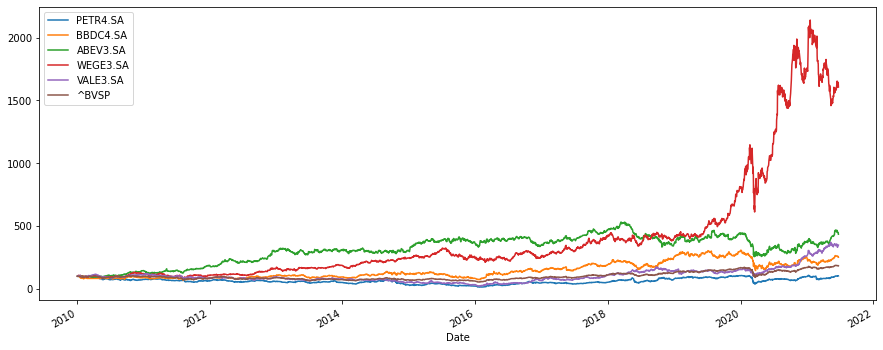

In [31]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

## Risco do portfólio

In [32]:
# Portfolio com ações de 5 empresas distribuídas igualmente, cada uma representando 20% do total.

bolsas = bolsas[['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA']]
retorno_risco = retorno_risco[['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA']]
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [33]:
# Variância do portfólio

pfolio_var = np.dot(weights.T, np.dot(retorno_risco.cov() * 250, weights))
print('A variância do portfólio de ações é de: ' + str(pfolio_var.round(4)))

A variância do portfólio de ações é de: 0.0677


In [34]:
# Volatilidade do portfólio

pfolio_vol = np.dot(weights.T, np.dot(retorno_risco.cov() * 250, weights)) ** 0.5
print('A volatilidade do portfólio de ações é de: ' + str(pfolio_vol.round(4) * 100) + '%')

A volatilidade do portfólio de ações é de: 26.02%


## Risco diversificável e não diversificável do portfólio

### risco diversificável = variância do portfólio - variância anual ponderada

#### Risco diversificável é aquele que o investidor pode reduzir comprando diferentes ações. Quando algumas sobem, outras caem por causa das diferentes condições setoriais às quais esses papéis estão expostos.


In [41]:
# Risco diversificável
# Portfólio com 2 ações, distribuídas igualmente em 50% de cada.

bolsas = bolsas[['PETR4.SA','BBDC4.SA']]
retorno_risco = retorno_risco[['PETR4.SA','BBDC4.SA']]
weights = np.array([0.5,0.5])
pfolio_var = np.dot(weights.T, np.dot(retorno_risco.cov() * 250, weights))

In [51]:
PETR_var_a = retorno_risco['PETR4.SA'].var() * 250
BBDC_var_a = retorno_risco['BBDC4.SA'].var() * 250

dr = pfolio_var - (weights[0] ** 2 * PETR_var_a) - (weights[1] ** 2 * BBDC_var_a)
print('O risco diversificável do portfólio é de ' + str(round(dr * 100, 2)))

O risco diversificável do portfólio é de 4.75


In [53]:
# Risco não diversificável

n_dr_1 = pfolio_var - dr
print('O risco não diversificável do portfólio é de ' + str(round(n_dr_1 * 100, 2)))

O risco não diversificável do portfólio é de 8.57


In [54]:
if(dr < n_dr_1):
  print('O risco diversificável do portfólio é de ' + str(round(dr * 100, 2)) + '% e o não diversificável é de ' + str(round(n_dr_1 * 100, 2)) + '%.')
  print('Portanto, há menos risco ao optar pelo diversificável.')
else:
  print('O risco diversificável do portfólio é de ' + str(round(dr * 100, 2)) + '% e o não diversificável é de ' + str(round(n_dr_1 * 100, 2)) + '%.')
  print('Portanto, há menos risco ao optar pelo não diversificável.')

O risco diversificável do portfólio é de 4.75% e o não diversificável é de 8.57%.
Portanto, há menos risco ao optar pelo diversificável.


# 4- Otimização de Portfólio de Markowitz

In [65]:
tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA']
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

In [66]:
retorno.mean() * 250

PETR4.SA    0.002218
BBDC4.SA    0.081135
ABEV3.SA    0.129281
WEGE3.SA    0.244449
VALE3.SA    0.109756
dtype: float64

In [68]:
retorno.cov() * 250

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,0.224530,0.095034,0.042527,0.045320,0.094537
BBDC4.SA,0.095034,0.118436,0.039794,0.037378,0.056603
ABEV3.SA,0.042527,0.039794,0.069949,0.028030,0.030200
WEGE3.SA,0.045320,0.037378,0.028030,0.100048,0.031891
VALE3.SA,0.094537,0.056603,0.030200,0.031891,0.176668


In [69]:
retorno.corr()

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,1.000000,0.582775,0.339337,0.302380,0.474662
BBDC4.SA,0.582775,1.000000,0.437200,0.343375,0.391310
ABEV3.SA,0.339337,0.437200,1.000000,0.335063,0.271663
WEGE3.SA,0.302380,0.343375,0.335063,1.000000,0.239878
VALE3.SA,0.474662,0.391310,0.271663,0.239878,1.000000


In [70]:
num_tickers = len(tickers)
num_tickers

5

In [73]:
weights = np.random.random(num_tickers)
weights /= np.sum(weights)
weights

array([0.07945328, 0.41672048, 0.0422457 , 0.08014923, 0.38143131])

In [75]:
weights[0] + weights[1] + weights[2] + weights[3] + weights[4]

1.0

## Retorno esperado do Portfólio

In [76]:
np.sum(weights * retorno.mean()) * 250

0.10090506200589791

## Variância esperada do Portfólio

---



In [77]:
np.dot(weights.T, np.dot(retorno.cov() *250, weights))

0.08634642703154703

## Volatilidade esperada do Portfólio

In [78]:
np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights)))

0.2938476255332805

## 1.000 combinações diferentes dos mesmos ativos

In [79]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (10000):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * retorno.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10523859, 0.09231165, 0.12585615, ..., 0.10568824, 0.11581472,
        0.11970613]),
 array([0.28260268, 0.29430501, 0.24965159, ..., 0.25697317, 0.24564413,
        0.26691069]))

In [80]:
portfolios = pd.DataFrame({'Retorno': pfolio_returns, 'Volatilidade': pfolio_volatilities})
portfolios.head()

,Retorno,Volatilidade
0,0.105239,0.282603
1,0.092312,0.294305
2,0.125856,0.249652
3,0.127955,0.257566
4,0.147113,0.241711


Text(0, 0.5, 'Retorno esperado')

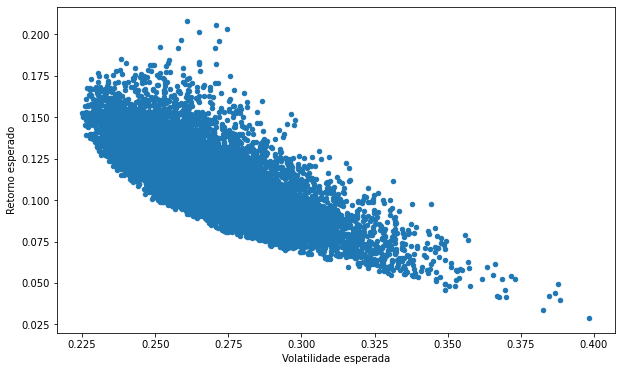

In [81]:
portfolios.plot(x='Volatilidade', y='Retorno', kind='scatter', figsize=(10,6))
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

<function matplotlib.pyplot.show>

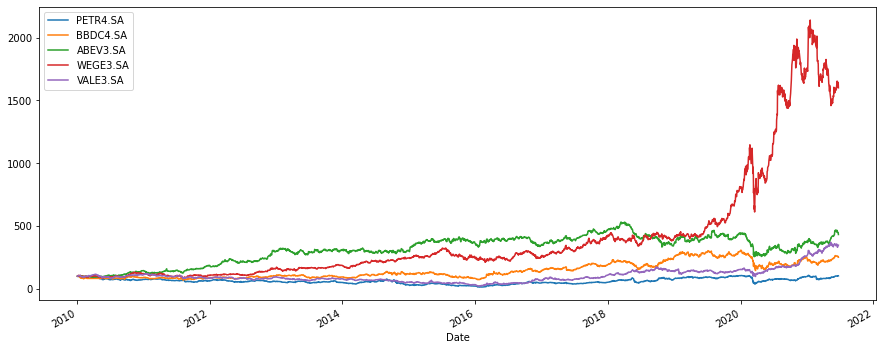

In [82]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

<function matplotlib.pyplot.show>

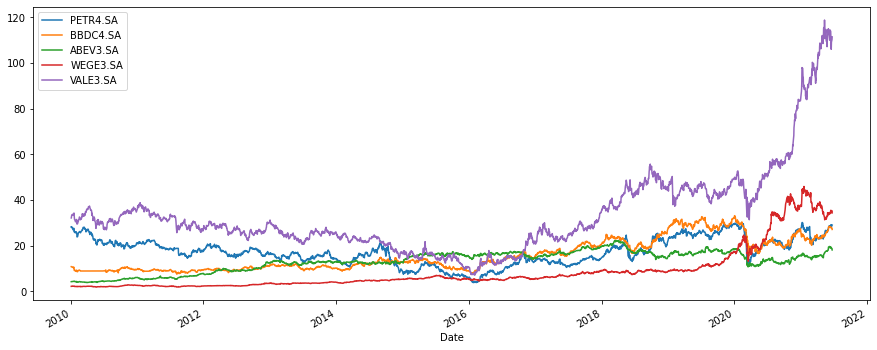

In [83]:
bolsas.plot(figsize = (15, 6));
plt.show

# 5- Modelo de Precificação de Ativos Financeiros (CAPM)

### Medindo o Beta
### Mede o risco de mercado que não pode ser evitado através da diversificação.
### Quanto mais volátil uma ação, maior seu beta. O beta varia entre -1 e 2.
### B = 0 nenhuma relação; B < 1 defensiva; B > 1 agressiva
### Ações defensivas perdem menos quando a economia está mal e ganham menos quando estão bem; agressivas são o oposto.

In [84]:
tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA','^BVSP']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo',start='2015-1-1')['Adj Close']

In [85]:
sec_returns = np.log( data / data.shift(1))

In [86]:
cov = sec_returns.cov() * 250
cov

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,0.290435,0.127336,0.059335,0.069684,0.128699,0.115564
BBDC4.SA,0.127336,0.143975,0.052392,0.051475,0.072426,0.086294
ABEV3.SA,0.059335,0.052392,0.078302,0.040355,0.037260,0.045983
WEGE3.SA,0.069684,0.051475,0.040355,0.125182,0.042026,0.052818
VALE3.SA,0.128699,0.072426,0.037260,0.042026,0.241810,0.079689
^BVSP,0.115564,0.086294,0.045983,0.052818,0.079689,0.072815


In [87]:
# Covariação da primeira ação com o mercado.

cov_with_market = cov.iloc[0,5]
cov_with_market

0.11556351882786128

In [88]:
market_var = sec_returns['^BVSP'].var() * 250
market_var

0.07281537764552444

In [89]:
logn_beta = cov_with_market / market_var
logn_beta

1.5870757326898837

In [90]:
# Covariação da seegunda ação com o mercado.

cov_with_market = cov.iloc[1,5]
cov_with_market

0.08629439856752956

In [91]:
market_var = sec_returns['^BVSP'].var() * 250
market_var

0.07281537764552444

In [92]:
vvar_beta = cov_with_market / market_var
vvar_beta

1.1851122847652167

### Ação livre de risco = retorno de 2,5%.
### Beta
### Prêmio de risco das ações = entre 4,5% e 5,5%
### Retorno esperado para valer a pena investir na ação


In [93]:
logn_er = 0.025 + logn_beta * 0.05
logn_er

0.10435378663449418

In [94]:
vvar_beta = 0.025 + vvar_beta * 0.05
vvar_beta

0.08425561423826083

### Se o retorno ficar abaixo do calculado, não vale a pena investir nessa ação.

## Índice de Sharp
### Decidir o melhor portfólio em termos de risco e retorno

In [95]:
sharpe_logn = (logn_er - 0.025) / (sec_returns['PETR4.SA'].std() * 250 ** 0.5)
sharpe_logn

0.14724581342135498

In [96]:
sharpe_vvar = (logn_er - 0.025) / (sec_returns['BBDC4.SA'].std() * 250 ** 0.5)
sharpe_vvar

0.2091337257552561

# 6- Análise de Regressão Multivariada

# 7- Simulações de Monte Carlo
### Observar os possíveis diferentes resultados de um evento futuro
### 1 - Prever o preço da ação

In [97]:
log_returns_1 = np.log(1 + data['BBDC4.SA'].pct_change())

In [98]:
log_returns_1.tail()

Date
2021-06-16    0.004998
2021-06-17   -0.004283
2021-06-18   -0.012959
2021-06-21    0.002533
2021-06-22   -0.022662
Name: BBDC4.SA, dtype: float64

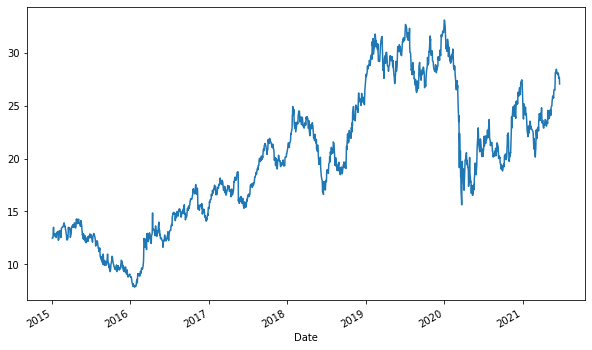

In [99]:
data['BBDC4.SA'].plot(figsize=(10,6))

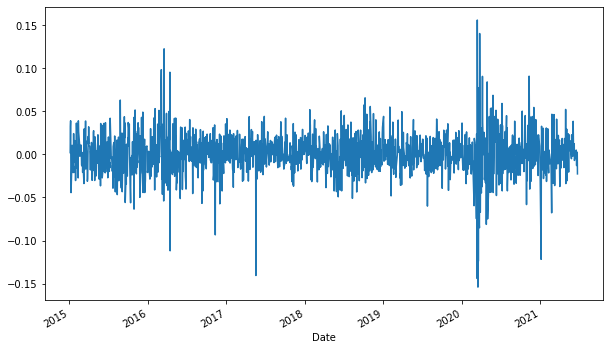

In [100]:
log_returns_1.plot(figsize=(10,6))

In [101]:
u = log_returns_1.mean()
u

0.00048268051526948716

In [102]:
var = log_returns_1.var()
var

0.0005759000988055493

In [103]:
drift = u - (0.5 * var)
drift

0.0001947304658667125

In [104]:
stdev = log_returns_1.std()
stdev

0.023997918634863925

In [105]:
type(drift)

float

In [106]:
type(stdev)

float

In [107]:
np.array(drift)

array(0.00019473)

In [108]:
np.array(stdev)

array(0.02399792)

In [109]:
norm.ppf(0.95)

1.6448536269514722

In [110]:
x = np.random.rand(10,2)
x

array([[0.1375216 , 0.476666  ],
       [0.88895099, 0.23867972],
       [0.80562296, 0.27526213],
       [0.61073832, 0.78342711],
       [0.59390909, 0.86833715],
       [0.60692248, 0.48058688],
       [0.17308632, 0.98514681],
       [0.92913828, 0.35606289],
       [0.81974309, 0.15494687],
       [0.34971078, 0.83489065]])

In [111]:
norm.ppf(x)

array([[-1.09152213, -0.05852305],
       [ 1.22096832, -0.71055597],
       [ 0.86187905, -0.59697473],
       [ 0.28124386,  0.78381991],
       [ 0.23761229,  1.11856515],
       [ 0.27130685, -0.04868071],
       [-0.94203908,  2.17398355],
       [ 1.46940324, -0.3690026 ],
       [ 0.91438643, -1.01544503],
       [-0.38610141,  0.97367344]])

In [112]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 0.04935355, -0.08017416],
       [-0.54310184, -0.54576904],
       [ 0.9091663 , -2.06664524],
       [-0.02889723, -1.38669732],
       [ 0.35710849, -1.57986966],
       [-0.95940626,  0.26737952],
       [-0.30262708, -1.68064958],
       [-0.13367516, -0.12217572],
       [-0.31083816, -0.46218148],
       [-0.54058518, -0.9606841 ]])

In [113]:
t_intervals = 100
iterations = 10

In [114]:
daily_returns = np.exp(np.array(drift) + np.array(stdev) * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99151553, 0.97899128, 0.94786244, 0.97595447, 0.98463069,
        0.98576133, 1.01422121, 0.9653542 , 1.02556538, 0.99177212],
       [1.02197258, 1.00976898, 0.99740602, 1.00658211, 0.98302988,
        1.01808452, 0.97556959, 0.98183495, 0.9962146 , 1.02170264],
       [1.01280896, 0.97992399, 0.97021274, 1.06926851, 1.0014539 ,
        1.0352429 , 1.0068004 , 0.97834923, 1.01436718, 1.03059796],
       [0.97229107, 0.98771182, 0.96531641, 0.97911119, 1.02062131,
        1.01556032, 1.0115897 , 0.98968399, 0.98846339, 0.99947532],
       [0.98662576, 0.98953041, 0.99430909, 1.00900012, 0.96747457,
        0.97888376, 1.01609393, 0.96511422, 0.97750688, 1.01639274],
       [0.95858922, 0.98125068, 0.98350197, 0.97907067, 0.93945519,
        1.01607264, 1.01069609, 0.99434353, 0.98989148, 0.99421844],
       [1.01408152, 0.97146863, 1.01857716, 0.98449567, 0.9803813 ,
        0.96542801, 0.99841062, 1.00077985, 1.04877441, 1.05194273],
       [1.03217829, 0.97864061, 0.9932393

In [115]:
s0 = data['BBDC4.SA'].iloc[-1]
s0

27.049999237060547

In [116]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [117]:
price_list[0] = s0
price_list

array([[27.04999924, 27.04999924, 27.04999924, 27.04999924, 27.04999924,
        27.04999924, 27.04999924, 27.04999924, 27.04999924, 27.04999924],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [118]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [119]:
price_list

array([[27.04999924, 27.04999924, 27.04999924, 27.04999924, 27.04999924,
        27.04999924, 27.04999924, 27.04999924, 27.04999924, 27.04999924],
       [27.6443574 , 27.31425003, 26.97983196, 27.2280452 , 26.59095746,
        27.5391854 , 26.38915662, 26.55863465, 26.94760429, 27.6370557 ],
       [27.99845279, 26.7658889 , 26.17617657, 29.11409138, 26.62961805,
        28.50974606, 26.56861353, 25.98361987, 27.33476533, 28.48269325],
       [27.22264549, 26.4369849 , 25.26829286, 28.50593262, 27.17875572,
        28.9533669 , 26.87653587, 25.71557254, 27.01941475, 28.46774898],
       [26.85856318, 26.16020059, 25.12449321, 28.76248948, 26.29475499,
        28.34198059, 27.30908504, 24.81846478, 26.41166368, 28.93441332],
       [25.74632909, 25.66971467, 24.70998854, 28.16050985, 24.70274396,
        28.79751113, 27.60118539, 24.67807988, 26.14468091, 28.76712723],
       [26.10887655, 24.93732252, 25.16902999, 27.72390004, 24.21810827,
        27.80192399, 27.55731674, 24.69732501

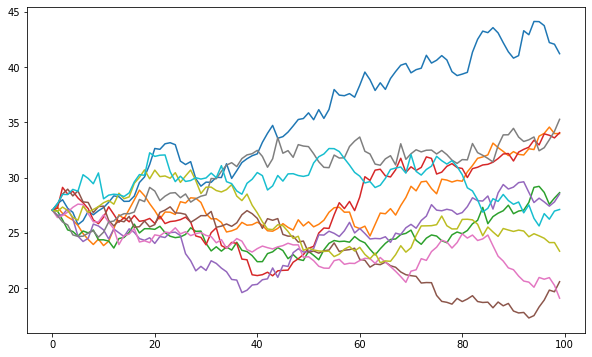

In [120]:
plt.figure(figsize=(10,6))
plt.plot(price_list)